Import Libraries 📚➡️🔄

In [20]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import cv2
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np

#  3 # 🧼 Data Preprocessing – Real-Time Hand Gesture Dataset
 Our Notebook handles the preprocessing for our hand gesture dataset project by:
- Loading the image
- Resizing and normalizing the image
- Spliting the data into train and test
- Visualing checking the preprocessed data
  
NH & M

Number of images per class 🔢🖼️➡️📚

In [21]:
IMG_SIZE = 64

Load, Resize, and Normalize Images 🔄, 🔎➕, 🔄➡️🌐🖼️

In [22]:
BATCH_SIZE = 32
SEED = 42
DATA_PATH = "real_time_gesture/Dataset"
# 🔄 Load, Resize, and Label Automatically
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_PATH,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_PATH,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)


Found 5243 files belonging to 10 classes.
Using 4195 files for training.
Found 5243 files belonging to 10 classes.
Using 1048 files for validation.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
AUTOTUNE = tf.data.AUTOTUNE

def preprocess(ds, is_train=False):
    def to_grayscale(image, label):
        image = tf.image.rgb_to_grayscale(image)
        return image, label

    ds = ds.map(to_grayscale, num_parallel_calls=AUTOTUNE)
    ds = ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)
    ds = ds.cache()
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = preprocess(train_ds, is_train=True )
test_ds = preprocess(test_ds)

# 4. Baseline Model 🚀


1️⃣ Model Overview 📊
In this section, we kick things off with a simple Convolutional Neural Network (CNN) model.
This baseline helps us evaluate our starting point before diving into more complex architectures.

🎯 What We Achieved:

Trained a CNN on our dataset

Evaluated the model using accuracy and loss

✨ Every great model starts with a solid baseline. We’re on the right track, team!

2️⃣ Model Architecture 🧠
The model is compact but effective, composed of the following layers:

🧩 Conv2D: A convolutional layer with 6 filters of size 3x3

🔄 Flatten: Converts the feature map into a 1D vector

🎯 Dense: Fully connected layer with 10 neurons representing the output classes

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
# input layer
model.add(layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
# convereetd it from 3D to 1D
model.add(layers.Flatten())

# output layer
model.add(layers.Dense(10, activation='softmax'))

💡 It’s small, but it’s mighty — this model lays the groundwork for everything that’s coming next!

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 23064)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │       230,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,710 (901.21 KB)

 Trainable params: 230,710 (901.21 KB)

 Non-trainable params: 0 (0.00 B)

3️⃣ Training 🚀 

Model Compilation ⚙️
Optimizer: Adam

Loss Function: sparse_categorical_crossentropy (why? Because we have labels from [0, 1, ..., 9]).

Metrics: Accuracy

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy'])

In [ ]:
epochs = 20
history = model.fit(train_ds, validation_data=test_ds,epochs=epochs ,verbose=1)

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 160ms/step - accuracy: 0.3645 - loss: 1.8078 - val_accuracy: 0.6842 - val_loss: 0.9967
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.7773 - loss: 0.7400 - val_accuracy: 0.7424 - val_loss: 0.7877
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.8859 - loss: 0.4454 - val_accuracy: 0.7672 - val_loss: 0.6990
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.9416 - loss: 0.2793 - val_accuracy: 0.7767 - val_loss: 0.6652
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.9737 - loss: 0.1785 - val_accuracy: 0.7939 - val_loss: 0.6214
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.9902 - loss: 0.1109 - val_accuracy: 0.7948 - val_loss: 0.6051
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - accuracy: 0.9977 - loss: 0.0730 - val_accuracy: 0.8006 - val_loss: 0.5982
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.9994 - loss: 0

🚀 Big Win! that’s a solid start!

💡 It’s clear that there’s stability in performance, but this might lead to overfitting over time if we continue training without techniques like dropout or regularization.

🎉 But we're on the right track! With some model improvements, we'll achieve even better results.

🗣 Team, we’re laying the groundwork for something extraordinary. Let’s keep up the momentum and keep pushing forward!

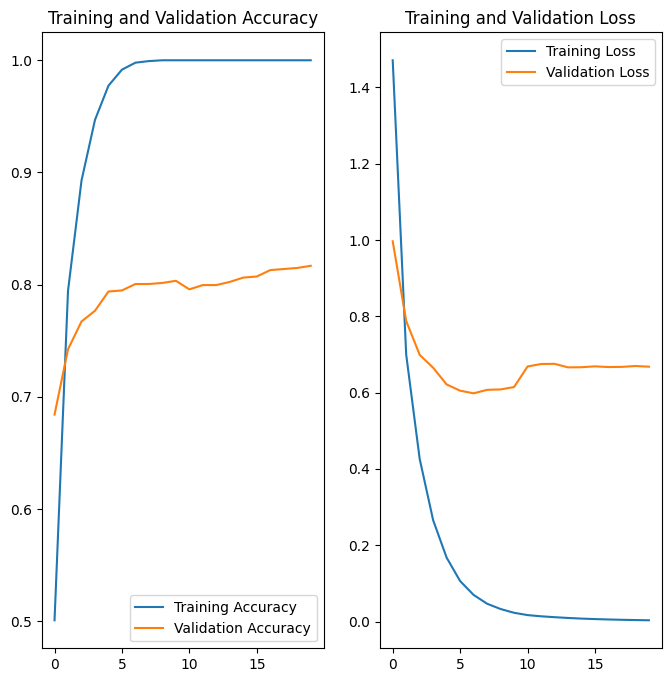

In [ ]:
acc = history.history['accuracy']
#get validation accuracy
val_acc = history.history['val_accuracy']
# get train loss
loss = history.history['loss']
#get validation loss
val_loss = history.history['val_loss']

epochs_range = range(epochs)
# plot accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()